In [1]:
import csv
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pylab as pb
#import seaborn as sns   # uncomment for fancy graphs - requires seaborn
from scipy import stats

%matplotlib inline

## 1. Reading and storing the data

In [2]:
# Opening data - year 2005, collapsed by firm
with open('PD05_wage.csv', 'rb') as f:
    reader = csv.reader(f)
    data = list(reader)

In [3]:
# Passing data to lists, then to arrays (should change this to make it all in one) 
firmID = []
size = []
wage = []
profit = []
skill_w = []
firm_age = []
industry_code = []
region = []
for row in data[1:]:
    firmID.append(row[0])
    size.append(int(row[1]))
    wage.append(float(row[2]))
    profit.append(float(row[3]))
    skill_w.append(float(row[4]))
    if row[5]== '':
        firm_age.append(0)
    else:
        firm_age.append(float(row[5]))
    if row[6]== '':
        industry_code.append(0)
    else:
        industry_code.append(int(row[6]))
    region.append(int(row[7]))
# Firm unique code (string)
firmID = np.asarray(firmID)
# Firm size in workers (int)
size = np.asarray(size)
# Daily average wage for each firm, in euros (float)
wage = np.asarray(wage)
# Declared average profits for each firm per year, in euros (float)
profit = np.asarray(profit)
# Average education level of workers per firm, from 0 to 6 (float)
skill_w = np.asarray(skill_w)
# Firm age in years (float) Missing observations have a 0.
firm_age = np.asarray(firm_age)
# Industry codes (int) Missing observations have a 0.
industry_code = np.asarray(industry_code)
# Regional code (int)
region = np.asarray(region)

In [33]:
#Calculating 90th percentile
bound = 99
perc_values = []
variab = [size, wage,profit, skill_w,firm_age]
for vari in zip(variab):
    ppp = np.percentile(vari,bound)
    perc_values.append(ppp)
    #print np.percentile(vari,bound)
print perc_values

[1478.0, 340.63629799999967, 60660.62000000001, 4.5999999999999996, 59.944004399999834]


In [34]:
def trim_data(xs, ys, x_value):
	x_new = []
	y_new = []
	for i in range(len(xs)):
		if xs[i]<= x_value:
			x_new.append(xs[i])
			y_new.append(ys[i])

	return np.asarray(x_new), np.asarray(y_new)

In [35]:
wage_copy,profit_copy = trim_data(wage,profit,perc_values[1])

## 2. Histograms
### 2.1 Main histograms

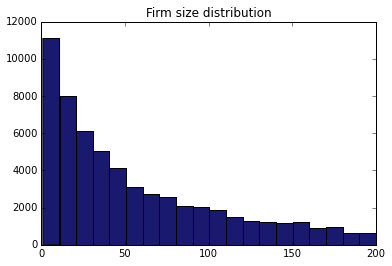

In [36]:
# Firm size distribution
plt.hist(size, bins=20, range=(1,200), color='midnightblue')
plt.title('Firm size distribution')
plt.show()

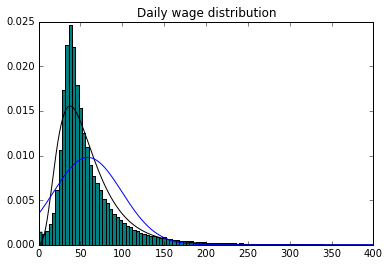

340.6127
0.0646695833407
6.61614560563e-265
0.167542835488
0.0
3.07071115165 -1.24702287932 19.5481075042


In [59]:
# Daily wage distribution
plt.hist(wage_copy, bins=100, range=(0,400), color='teal', normed=True)
shapew, locationw, scalew = stats.lognorm.fit(wage_copy)
wage_m = stats.lognorm.pdf(np.arange(0,400,0.5), s=shapew, loc=locationw, scale=scalew)
(mu, sigma) = stats.norm.fit(wage_copy)
y = pb.normpdf(np.arange(0,400,0.1), mu, sigma)

plt.plot(np.arange(0,400,0.5),wage_m, color='black')
plt.plot(np.arange(0,400,0.1),y, color='blue')
plt.title('Daily wage distribution')
plt.show()
print max(wage_copy)
D,p = stats.kstest(wage_copy,'lognorm', args=(shapew,locationw,scalew))
print D
print p
D,p = stats.kstest(wage_copy,'norm', args=(mu,sigma))
print D
print p

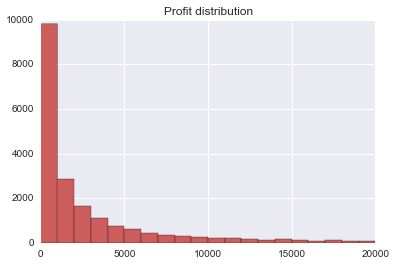

In [6]:
# Profit distribution
plt.hist(profit, bins=20, range=(1,20000), color='indianred')
plt.title('Profit distribution')
plt.xlim(0,20000)
plt.show()

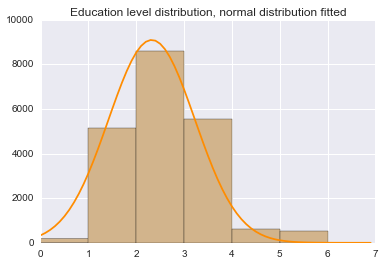

In [7]:
# Education level distribution
(mu, sigma) = stats.norm.fit(skill_w)
y = pb.normpdf(np.arange(0,7,0.1), mu, sigma)
plt.plot(np.arange(0,7,0.1), y*len(skill_w), color='darkorange')
plt.hist(skill_w, bins=6, range=(0,6), color='tan')
plt.title('Education level distribution, normal distribution fitted')
plt.xlim(0,7)
plt.show()

### 2.2 Fitting Profits

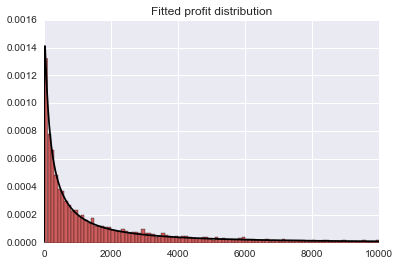

In [49]:
# Fitted profit distribution
shape, location, scale = stats.lognorm.fit(profit)
yp = stats.lognorm.pdf(np.arange(0,10000,1), s=shape, loc=location, scale=scale)
plt.plot(np.arange(0,10000,1),yp, color='black')
plt.hist(profit, bins=200, normed=True, range=(1,20000), color='indianred')
plt.title('Fitted profit distribution')
plt.xlim(0,10000)
plt.show()

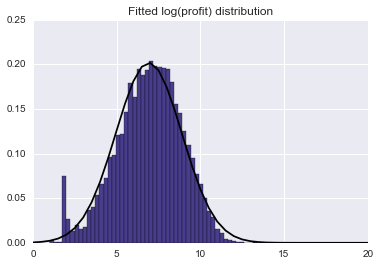

In [32]:
# Fitted log(profit) distribution
ay = stats.norm.pdf(np.arange(0,20000,0.5), loc=np.log(1011.362795903843), scale=1.9779766196902311)
plt.plot(np.arange(0,20000,0.5), ay, color='black')
plt.hist(np.log(profit), bins=400, normed=True, range=(1,100), color='darkslateblue')
plt.xlim(0,20)
plt.title('Fitted log(profit) distribution')
plt.show()

### 2.3 Fitting Size (not needed for solver)

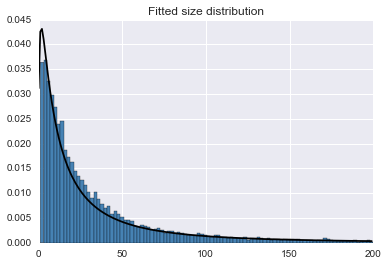

In [22]:
# Fitted size distribution
shape1, location1, scale1 = stats.lognorm.fit(size)
ys = stats.lognorm.pdf(np.arange(0,200,1), s=shape1, loc=location1, scale=scale1)
plt.plot(np.arange(0,200,1), ys, color='black')
plt.hist(size, bins=100, range=(1,200), normed=True, color='steelblue')
plt.title('Fitted size distribution')
plt.show()